# Random Forest Regression (Buildings)
____

#### Libraries
____

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

import statsmodels.formula.api as sm
from sklearn.model_selection import cross_val_score

%matplotlib inline

#### Load dataset
___

In [35]:
dataset = '../../data/commercial_data_clear.csv'
columns = ['ptype', 'floor_area', 'build_year', 'occupy', 'star', 'site_eui', 'ngas', 'water_use', 'total_fuel']


df = pd.read_csv(dataset, sep=',', usecols=columns)

cond1 = df['ptype'] == 'K-12 School'

building = df[cond1]

building.head(5)

,ptype,floor_area,build_year,occupy,star,site_eui,ngas,water_use,total_fuel
244,K-12 School,322505.0,1928,100,49.000000,75.9,2904463.4,15917.984063,1.158455e+07
281,K-12 School,36500.0,1947,100,59.854594,46.6,874188.3,15917.984063,3.976671e+06
1199,K-12 School,214783.0,1928,80,67.000000,75.7,6542200.2,2490.300000,3.976671e+06
1624,K-12 School,90600.0,1988,100,29.000000,90.2,6003028.0,4870.300000,3.976671e+06
2227,K-12 School,71000.0,2001,100,34.000000,90.5,2457100.8,1430.200000,3.976671e+06


In [36]:
building.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 244 to 11725
Data columns (total 9 columns):
ptype         90 non-null object
floor_area    90 non-null float64
build_year    90 non-null int64
occupy        90 non-null int64
star          90 non-null float64
site_eui      90 non-null float64
ngas          90 non-null float64
water_use     90 non-null float64
total_fuel    90 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 7.0+ KB


In [37]:
building.describe()

,floor_area,build_year,occupy,star,site_eui,ngas,water_use,total_fuel
count,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01,90.000000,9.000000e+01
mean,113176.088889,1957.888889,99.555556,62.010913,72.422700,5.771013e+06,10683.206171,3.603263e+06
std,78845.820415,31.526498,2.445409,30.407385,45.616365,1.060378e+07,7560.418928,1.647142e+06
min,36500.000000,1891.000000,80.000000,1.000000,2.900000,6.290900e+03,109.400000,0.000000e+00
25%,63950.000000,1929.250000,100.000000,40.000000,46.625000,1.015279e+06,1849.975000,3.976671e+06
50%,86618.000000,1961.500000,100.000000,67.500000,62.250000,2.547472e+06,15917.984063,3.976671e+06
75%,124815.000000,1972.750000,100.000000,89.500000,77.850000,4.555968e+06,15917.984063,3.976671e+06
max,444000.000000,2016.000000,100.000000,100.000000,280.071484,5.048545e+07,33570.600000,1.158455e+07


#### Data cleanup
___

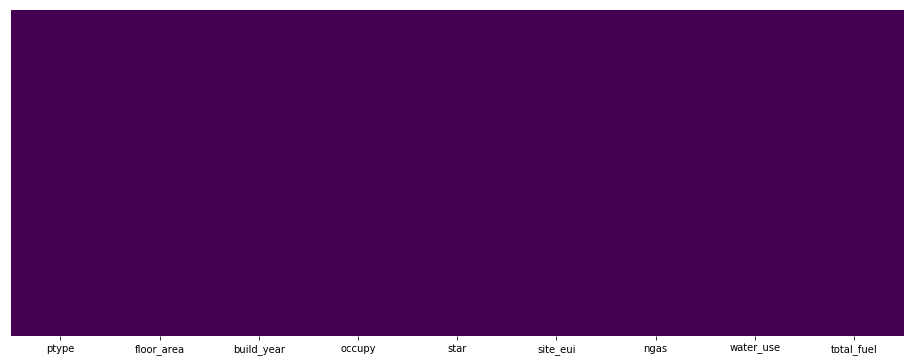

In [38]:
plt.figure(figsize=(16,6))

sns.heatmap(building.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#### Define X, Y variables
___

In [39]:
x_columns = ['floor_area', 'build_year', 'occupy', 'star', 'ngas', 'water_use', 'total_fuel']
y_columns = ['site_eui']

X = building[x_columns].values
Y = building[y_columns].values

#### Split dataset (TRAIN/TEST) data
____

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### Fitting Random Forest to the dataset
____

In [45]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, Y)

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Fitting Simple Linear Regression to the Training Set
_____

In [46]:
y_prediction = regressor.predict(X_test)


#### Real x Predict
_____

In [47]:
pd.DataFrame({
    'Real' : Y_test[:,0],
    'Predict' : y_prediction

})

,Real,Predict
0,75.7,72.889000
1,50.7,52.932000
2,43.5,49.428000
3,57.9,80.269148
4,46.7,50.972000
5,69.5,72.067000
6,78.1,76.569000
7,61.8,63.706000
8,44.2,50.919000
9,54.8,56.575000


#### Model Score
__________

In [48]:
print(f"Training Data Score: {regressor.score(X_train, Y_train)}")
print(f"Testing Data Score: {regressor.score(X_test, Y_test)}")

Training Data Score: 0.9029082241437658
Testing Data Score: 0.8861790018972006


#### Applying K-Fold Cross Validation
_____

In [49]:
accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv = 10)

C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A co

In [50]:
print (accuracies)

[ 0.47274196  0.137318    0.63098629 -0.78757853  0.79100785 -0.5356216
 -0.04914697  0.70161257  0.34778323  0.75415615]


In [51]:
accuracies.mean()

0.24632589485213208

In [52]:
accuracies.std()

0.5244963848510852